In [1]:
from mousestyles.data import load_movement
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt

# Extract distances
Here are a bunch of functions for extracting distances with a given delta t 
(step) which corresponds to the interval of time used for the data 
to be aggregated.
## Strain, mouse, day
Extract the distance distribution for a particular mouse of a given strain 
at a particular day.

In [2]:
def extract_distances(strain, mouse, day, step=1e2):
    """
    Return a numpy array object of project movement data
    for the specified combination of strain, mouse and day.

    The array contains the distance between two different times
    taken with the same time interval

    Parameters
    ----------
    strain: int
        nonnegative integer indicating the strain number
    mouse: int
        nonnegative integer indicating the mouse number
    day: int
        nonnegative integer indicating the day number
    step: float
        positive float defining the time between two observations

    Returns
    -------
    movement : numpy array
    """
    movement = load_movement(strain, mouse, day)
    # Compute distance between samples
    dist = np.empty((movement.shape[0], 2))
    dist[0,0] = sqrt(movement.iloc[0, 1]*movement.iloc[0, 1]+
                     movement.iloc[0, 2]*movement.iloc[0, 2])
    for i in range(1, len(dist[:, 0])):
        x1 = movement.iloc[i-1, 1]
        y1 = movement.iloc[i-1, 2]
        x2 = movement.iloc[i, 1]
        y2 = movement.iloc[i, 2]
        x = x2 - x1
        y = y2 - y1
        d = sqrt(x*x+y*y)
        dist[i,0] = d
    dist[:, 1] = np.array(movement['t'])
    dist[:, 1] = dist[:, 1] - dist[0, 1]
    tf = dist[dist.shape[0]-1, 1]
    # Aggregate distances according to step
    aggregate = np.zeros(int(tf/step))
    j = 0
    for i in range(len(aggregate)):
        while dist[j, 1]<i*step:
            aggregate[i] = aggregate[i] + dist[j, 0]
            j = j+1
    return(aggregate)

In [3]:
e = extract_distances(1, 1, 1, step=1e2)

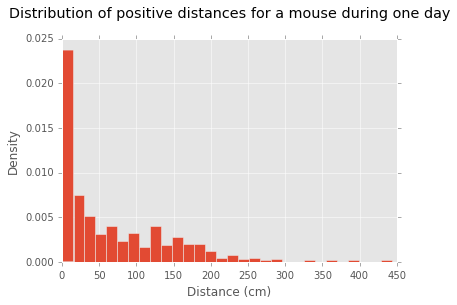

In [4]:
%matplotlib inline
plt.style.use('ggplot')
plt.figure()
plt.hist(e[e>0],30,normed=True)
plt.title('Distribution of positive distances for a mouse during one day\n')
plt.xlabel("Distance (cm)")
plt.ylabel("Density")
plt.show()

## Strain, mouse
Extract the distance distribution for a particular mouse of a given
strain for all days.

In [3]:
def extract_distances_bymouse(strain, mouse, step=1e2, verbose=False):
    """
    Aggregates extract_distances for all days.

    Parameters
    ----------
    strain: int
        nonnegative integer indicating the strain number
    mouse: int
        nonnegative integer indicating the mouse number
    step: float
        positive float defining the time between two observations

    Returns
    -------
    movement : numpy array

    """
    day = 0
    res = []
    while True:
        try:
            res.append(list(extract_distances(strain, mouse, day, step=step)))
            day = day + 1
            if verbose:
                print('day %s done.' % day)
        except IOError:
            break
    res = pd.DataFrame(res)
    return(np.array(res.sum(axis=0)))
    
    

In [6]:
e_bymouse = extract_distances_bymouse(1, 1, step=1e2, verbose=True)

day 1 done.
day 2 done.
day 3 done.
day 4 done.
day 5 done.
day 6 done.
day 7 done.
day 8 done.
day 9 done.
day 10 done.
day 11 done.
day 12 done.


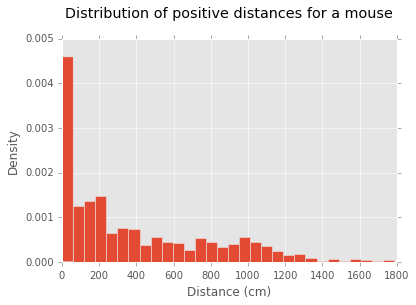

In [7]:
%matplotlib inline
plt.style.use('ggplot')
plt.figure()
plt.hist(e_bymouse[e_bymouse>0],30,normed=True)
plt.title('Distribution of positive distances for a mouse\n')
plt.xlabel("Distance (cm)")
plt.ylabel("Density")
plt.show()

## Strain
Extract the distance distribution for a particular strain for all mice for all days.

In [15]:
def extract_distances_bystrain(strain, step=1e2, verbose=False):
    """
    Aggregates extract_distances_bymouse for all mice in a strain.

    Parameters
    ----------
    strain: int
        nonnegative integer indicating the strain number
    step: float
        positive float defining the time between two observations

    Returns
    -------
    movement : numpy array

    """
    mouse = 0
    res = []
    e = np.array([0])
    while e.size>0:
        e = extract_distances_bymouse(strain, mouse, step=step)
        res.append(list(e))
        mouse = mouse + 1
        if verbose:
            print('mouse %s done.' % mouse)
    res = pd.DataFrame(res)
    return(np.array(res.sum(axis=0)))

In [16]:
e_bystrain = extract_distances_bystrain(0, verbose=True)

mouse 1 done.
mouse 2 done.
mouse 3 done.
mouse 4 done.
mouse 5 done.


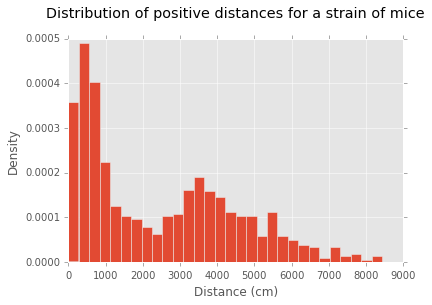

In [17]:
%matplotlib inline
plt.style.use('ggplot')
plt.figure()
plt.hist(e_bystrain[e_bystrain>0], 30, normed=True)
plt.title('Distribution of positive distances for a strain of mice\n')
plt.xlabel("Distance (cm)")
plt.ylabel("Density")
plt.show()